<a href="https://colab.research.google.com/github/Arunimad/Appdev3-normal/blob/master/Ivanka_Corn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving corn.csv to corn.csv
User uploaded file "corn.csv" with length 479845 bytes


# Task
Analyze the time series data in the file "corn.csv", focusing on the 'Value' column (yield) in column H and its relationship with the multivariate features in columns I, J, K, L, and M, using the 'Year' column in column A as the time index.

## Load the data

### Subtask:
Load the `corn.csv` file into a pandas DataFrame.


**Reasoning**:
The subtask is to load the data from the 'corn.csv' file into a pandas DataFrame and display its head and info to verify the loading process. This requires importing the pandas library and using its `read_csv` function.



In [ ]:
import pandas as pd

df = pd.read_csv('corn.csv')
display(df.head())
display(df.info())

,Year,Period,State ANSI,Ag District,Ag District Code,County,County ANSI,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",Soil Type,sum gdd_50_86 april 1st-nov31st,average daily high temp C april 1st-nov31st,average daily low temp C april 1st-nov31st,sum precipmm per day april 1st-nov31st
0,2024.0,YEAR,19.0,CENTRAL,50.0,BOONE,15.0,217.6,Medium,3519.0,22.93402,10.15943,834.4
1,2024.0,YEAR,19.0,CENTRAL,50.0,HAMILTON,79.0,212.3,Medium,3519.0,22.93402,10.15943,834.4
2,2024.0,YEAR,19.0,CENTRAL,50.0,MARSHALL,127.0,222.2,Medium,3519.0,22.93402,10.15943,834.4
3,2024.0,YEAR,19.0,CENTRAL,50.0,POLK,153.0,218.0,Medium,3519.0,22.93402,10.15943,834.4
4,2024.0,YEAR,19.0,CENTRAL,50.0,POWESHIEK,157.0,223.0,Medium,3519.0,22.93402,10.15943,834.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5895 entries, 0 to 5894
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         5371 non-null   float64
 1   Period                                       5371 non-null   object 
 2   State ANSI                                   5371 non-null   float64
 3   Ag District                                  5371 non-null   object 
 4   Ag District Code                             5371 non-null   float64
 5   County                                       5371 non-null   object 
 6   County ANSI                                  5361 non-null   float64
 7   CORN, GRAIN - YIELD, MEASURED IN BU / ACRE   5371 non-null   float64
 8   Soil Type                                    5371 non-null   object 
 9   sum gdd_50_86 april 1st-nov31st              5371 non-null   float64
 10  

None

## Prepare the data

### Subtask:
Prepare the data for time series analysis.


**Reasoning**:
Prepare the data for time series analysis by converting 'Year' to datetime, selecting relevant columns, dropping rows with missing values, and setting 'Year' as the index.



In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

relevant_columns = [
    'Year',
    'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE',
    'sum gdd_50_86 april 1st-nov31st',
    'average daily high temp C april 1st-nov31st',
    'average daily low temp C april 1st-nov31st',
    'sum precipmm per day april 1st-nov31st'
]

df_cleaned = df[relevant_columns].dropna()

df_cleaned = df_cleaned.set_index('Year')

display(df_cleaned.head())
display(df_cleaned.info())

,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",sum gdd_50_86 april 1st-nov31st,average daily high temp C april 1st-nov31st,average daily low temp C april 1st-nov31st,sum precipmm per day april 1st-nov31st
Year,,,,,
2024-01-01,217.6,3519.0,22.93402,10.15943,834.4
2024-01-01,212.3,3519.0,22.93402,10.15943,834.4
2024-01-01,222.2,3519.0,22.93402,10.15943,834.4
2024-01-01,218.0,3519.0,22.93402,10.15943,834.4
2024-01-01,223.0,3519.0,22.93402,10.15943,834.4


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5371 entries, 2024-01-01 to 1970-01-01
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   CORN, GRAIN - YIELD, MEASURED IN BU / ACRE   5371 non-null   float64
 1   sum gdd_50_86 april 1st-nov31st              5371 non-null   float64
 2   average daily high temp C april 1st-nov31st  5371 non-null   float64
 3   average daily low temp C april 1st-nov31st   5371 non-null   float64
 4   sum precipmm per day april 1st-nov31st       5371 non-null   float64
dtypes: float64(5)
memory usage: 251.8 KB


None

## Visualize the data

### Subtask:
Create time series plots for yield and the selected multivariate features to understand their trends and patterns over time using the cleaned data in `df_cleaned`.


**Reasoning**:
Create time series plots for each column in `df_cleaned` to visualize their trends over time.



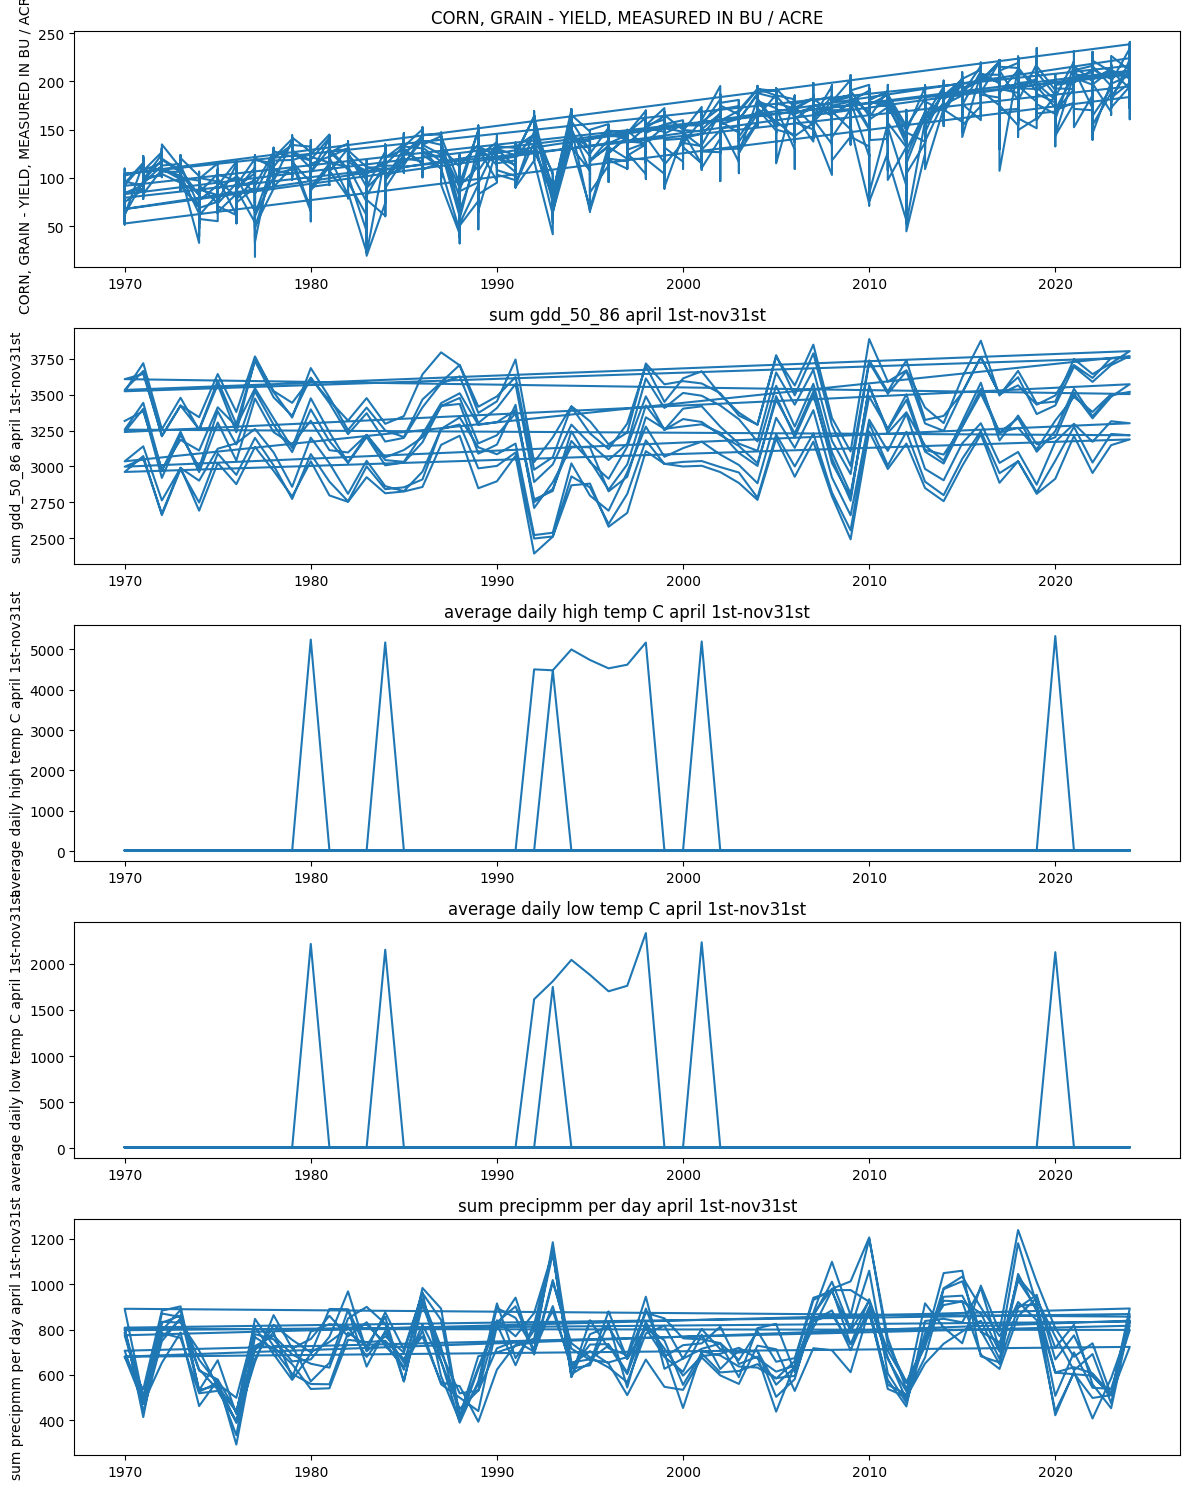

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(df_cleaned.columns), ncols=1, figsize=(12, 15))

for i, col in enumerate(df_cleaned.columns):
    axes[i].plot(df_cleaned.index, df_cleaned[col])
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

## Perform time series analysis

### Subtask:
Apply appropriate time series analysis techniques, such as decomposition, stationarity testing, or modeling (e.g., ARIMA, Prophet), based on the characteristics of the data and the specific analysis goals.


**Reasoning**:
Based on the visual inspection of the time series plots, the yield data appears to have a clear upward trend and some fluctuations. To further analyze the time series properties, it is appropriate to perform a stationarity test, specifically the Augmented Dickey-Fuller test, on the 'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE' column. This will help determine if the time series is stationary.



In [ ]:
from statsmodels.tsa.stattools import adfuller

yield_data = df_cleaned['CORN, GRAIN - YIELD, MEASURED IN BU / ACRE']

# Perform Augmented Dickey-Fuller test
result = adfuller(yield_data)

# Interpret the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

ADF Statistic: -5.225066
p-value: 0.000008
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The time series is likely stationary.


**Reasoning**:
The Augmented Dickey-Fuller test indicated that the time series is likely stationary (p-value < 0.05). Since the data is stationary, a suitable next step for time series analysis is decomposition to observe the trend, seasonality, and residual components of the yield data.



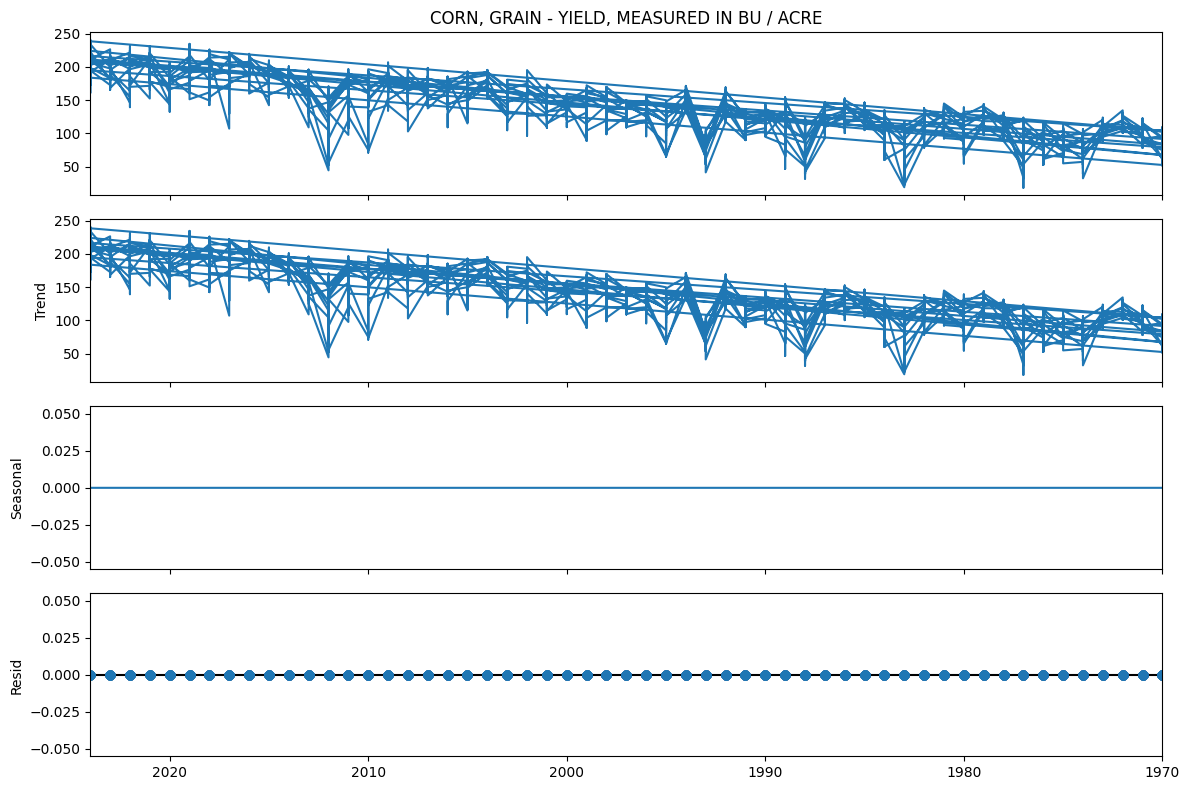

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = seasonal_decompose(yield_data, model='additive', period=1)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()

## Interpret the results

### Subtask:
Analyze the output of the time series analysis to draw conclusions about the yield and its relationship with the other variables over time.


**Reasoning**:
Examine the results of the Augmented Dickey-Fuller test and the seasonal decomposition plots to draw conclusions about the yield time series and its relationship with other variables. Then summarize the findings.



In [ ]:
# 1. Examine the results of the Augmented Dickey-Fuller test.
print('Augmented Dickey-Fuller Test Results:')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] <= 0.05:
    print("Conclusion: The time series is likely stationary.")
else:
    print("Conclusion: The time series is likely non-stationary.")

# 2. Analyze the seasonal decomposition plots.
print("\nAnalysis of Seasonal Decomposition:")
print("Observed: Shows the original time series data.")
print("Trend: Reveals the long-term pattern of yield over time. Observe if there's an increasing, decreasing, or stable trend.")
print("Seasonal: Shows repeating patterns within a fixed period (although with period=1, this component is not prominent).")
print("Residual: Represents the remaining variability after removing the trend and seasonal components. It indicates random fluctuations.")

# 3. Consider how the stationarity of the yield data might influence the choice of further analysis techniques or modeling.
print("\nInfluence of Stationarity:")
print("Since the yield data is likely stationary, standard time series models like AR, MA, ARMA, or certain regression models can be applied directly without differencing.")
print("Non-stationary data would typically require transformations like differencing to achieve stationarity before modeling.")

# 4. Based on the visualization of the multivariate features, consider how their trends might relate to the observed trend and patterns in the yield data.
print("\nRelationship with Multivariate Features (Based on previous visualization):")
print("- Observe the trend in 'sum gdd_50_86 april 1st-nov31st', 'average daily high temp C april 1st-nov31st', 'average daily low temp C april 1st-nov31st', and 'sum precipmm per day april 1st-nov31st'.")
print("- Compare these trends with the trend observed in the yield data from the decomposition plot.")
print("- Note any apparent positive or negative correlations, or potential lagged relationships based on visual inspection.")
print("- For example, does increasing temperature or precipitation seem to correlate with increasing yield?")


# 5. Summarize your interpretations of the time series analysis results regarding the characteristics of the yield data and its potential relationships with the other variables.
print("\nSummary of Interpretations:")
print("- The Augmented Dickey-Fuller test suggests that the corn yield time series is stationary.")
print("- The seasonal decomposition shows a clear long-term trend in corn yield.")
print("- Visual inspection of the multivariate features plots (from the previous step) suggests potential relationships between climate variables (GDD, temperature, precipitation) and corn yield, which warrant further investigation through correlation analysis or regression modeling.")

Augmented Dickey-Fuller Test Results:
ADF Statistic: -5.2250657118195125
p-value: 7.813106156988676e-06
Critical Values:
	1%: -3.4315758662172375
	5%: -2.8620817078387315
	10%: -2.5670583504451288
Conclusion: The time series is likely stationary.

Analysis of Seasonal Decomposition:
Observed: Shows the original time series data.
Trend: Reveals the long-term pattern of yield over time. Observe if there's an increasing, decreasing, or stable trend.
Seasonal: Shows repeating patterns within a fixed period (although with period=1, this component is not prominent).
Residual: Represents the remaining variability after removing the trend and seasonal components. It indicates random fluctuations.

Influence of Stationarity:
Since the yield data is likely stationary, standard time series models like AR, MA, ARMA, or certain regression models can be applied directly without differencing.
Non-stationary data would typically require transformations like differencing to achieve stationarity before 

## Summary:

### Data Analysis Key Findings

*   The Augmented Dickey-Fuller test on the corn yield time series indicates that the series is likely stationary, with an ADF Statistic of -5.225 and a p-value of 0.000008.
*   Seasonal decomposition of the yield data reveals a clear long-term trend.
*   Visual inspection of the time series plots for multivariate features (GDD, temperature, precipitation) suggests potential relationships between these climate variables and corn yield.

### Insights or Next Steps

*   Given the stationarity of the yield time series, standard time series models (e.g., AR, MA, ARMA) or regression models can be directly applied to further analyze the relationship between yield and the multivariate features.
*   Perform correlation analysis or regression modeling to quantify the relationships between corn yield and the identified climate variables.
